<a href="https://colab.research.google.com/github/SambhavVinay/melanoma_v1/blob/main/melanoma_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os, zipfile, warnings

In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [4]:
with zipfile.ZipFile("archive (19).zip", "r") as zip_ref:
    zip_ref.extractall(".")

base_dir = os.path.join("/content","archive (19).zip")
train_dir = "/content/melanoma_cancer_dataset/train"
test_dir = "/content/melanoma_cancer_dataset/test"

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
size = (150,150)
BATCH_SIZE = 32

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=size,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=size,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/tmp/ipython-input-3289541729.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=class_counts, palette="pastel")


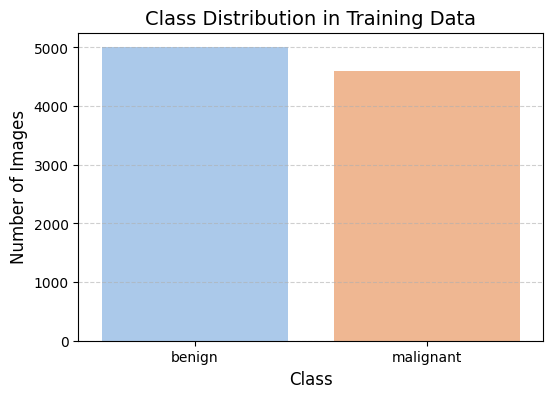

Benign images: 5000
Malignant images: 4605


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class_labels = list(train_generator.class_indices.keys())

class_counts = np.bincount(train_generator.classes)

plt.figure(figsize=(6, 4))
sns.barplot(x=class_labels, y=class_counts, palette="pastel")
plt.title("Class Distribution in Training Data", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

print(f"Benign images: {class_counts[0]}")
print(f"Malignant images: {class_counts[1]}")


In [15]:
model = keras.Sequential([

        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),


        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),


        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),


        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = keras.callbacks.ModelCheckpoint(
    "melanoma_best.keras",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

train_steps = train_generator.samples // train_generator.batch_size
val_steps = val_generator.samples // val_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=15,
    validation_data=val_generator,
    validation_steps=val_steps,
    callbacks=[early_stop,checkpoint],
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.6916 - loss: 0.6008
Epoch 1: val_accuracy improved from -inf to 0.86089, saving model to melanoma_best.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 73s 215ms/step - accuracy: 0.6919 - loss: 0.6004 - val_accuracy: 0.8609 - val_loss: 0.3047
Epoch 2/15
  1/300 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9062 - loss: 0.2532

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.86089 to 0.86593, saving model to melanoma_best.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9062 - loss: 0.2532 - val_accuracy: 0.8659 - val_loss: 0.2992
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.8619 - loss: 0.3340
Epoch 3: val_accuracy did not improve from 0.86593
300/300 ━━━━━━━━━━━━━━━━━━━━ 67s 192ms/step - accuracy: 0.8619 - loss: 0.3339 - val_accuracy: 0.8579 - val_loss: 0.3049
Epoch 4/15
  1/300 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8750 - loss: 0.3705
Epoch 4: val_accuracy did not improve from 0.86593
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.3705 - val_accuracy: 0.8619 - val_loss: 0.3017
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.8693 - loss: 0.3046
Epoch 5: val_accuracy improved from 0.86593 to 0.89718, saving model to melanoma_best.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 58s 193ms/step - accuracy: 0.8693 - loss: 0.3046 - val_accuracy: 0

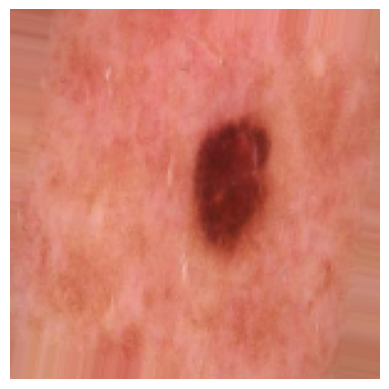

Label (numeric): 0.0
Label (class name): benign


In [19]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_generator)

plt.imshow(images[0])
plt.axis("off")
plt.show()

print("Label (numeric):", labels[0])
print("Label (class name):", list(train_generator.class_indices.keys())[int(labels[0])])

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step


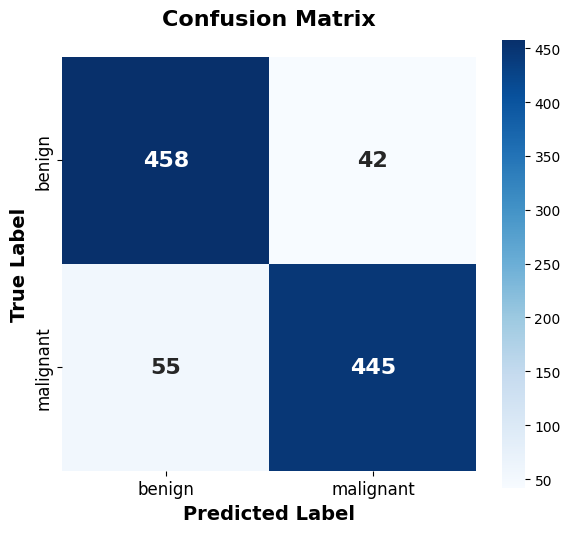


Performance Metrics:
Accuracy: 0.9030
Precision: 0.9138
Recall (Sensitivity): 0.8900
Specificity: 0.9160
F1-Score: 0.9017

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

      benign       0.89      0.92      0.90       500
   malignant       0.91      0.89      0.90       500

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000


Simple final model saved as 'simple_final_model.keras'


In [26]:
predictions = best_model.predict(val_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = val_generator.classes
cm = confusion_matrix(true_classes, predicted_classes)
class_names = list(val_generator.class_indices.keys())


plt.figure(figsize=(6, 6))


sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            annot_kws={'size': 16, 'weight': 'bold'},
            cbar_kws={'shrink': 0.8},
            square=True)

plt.title('Confusion Matrix\n', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

TN, FP, FN, TP = cm.ravel()




accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-Score: {f1_score:.4f}")


print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORT")
print("="*50)
print(classification_report(true_classes, predicted_classes, target_names=class_names))


best_model.save('simple_final_model.keras')
print("\nSimple final model saved as 'simple_final_model.keras'")


Saving Screenshot 2025-10-26 085313.png to Screenshot 2025-10-26 085313.png
Saving Screenshot 2025-10-26 085307.png to Screenshot 2025-10-26 085307.png
Saving Screenshot 2025-10-26 085302.png to Screenshot 2025-10-26 085302.png
Saving Screenshot 2025-10-26 085255.png to Screenshot 2025-10-26 085255.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


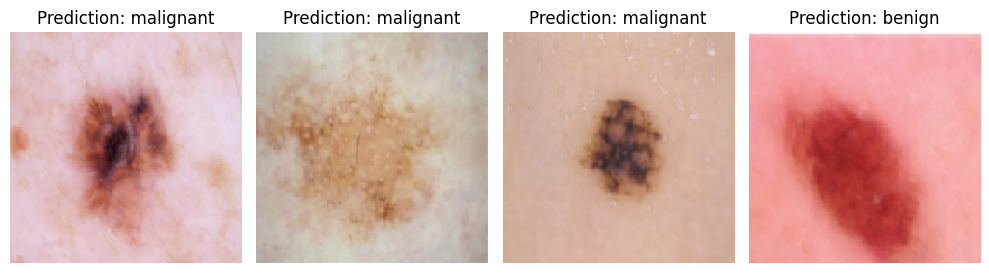

In [29]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


uploaded = files.upload()


plt.figure(figsize=(10, 5))

for i, fn in enumerate(uploaded.keys()):

    img = image.load_img(fn, target_size=(150, 150
    ))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0


    pred = model.predict(img_array)[0][0]
    label = "malignant" if pred > 0.5 else "benign"


    plt.subplot(1, len(uploaded), i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {label}")

plt.tight_layout()
plt.show()